<a href="https://colab.research.google.com/github/gustavoramos82/Classifica-o-de-Drogas/blob/main/Predi%C3%A7%C3%A3o_Drogas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo Drogas no Organismo

Neste projeto vai ser usado modelos de machine learning para prever qual tipo de droga está presente, em que vai ser feito uma análise exploratória, em seguida um pré-processamento, a modelagem e comparar as metricas para compara qual modelo teve a melhor perfomace.

In [ ]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px

## Análise exploratória

In [ ]:
dr = pd.read_csv('drug200.xls')
dr.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
dr['Drug'] = dr['Drug'].str.lower()

In [ ]:
dr.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugy
1,47,M,LOW,HIGH,13.093,drugc
2,47,M,LOW,HIGH,10.114,drugc
3,28,F,NORMAL,HIGH,7.798,drugx
4,61,F,LOW,HIGH,18.043,drugy


### Dicionário dos Dados

- **Age**: Idade da pessoa.
- **Sex**: Sexo da pessoa.
- **BP**: Pressão Sanguinea.
- **Cholesterol**: Nivel de colesterol.
- **Na_to_K**: Razão de sódio e potassio no sangue.

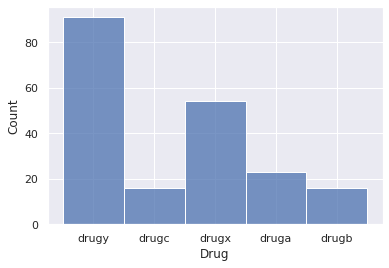

In [ ]:
sns.histplot(x='Drug',data=dr)

In [ ]:
dr.shape

(200, 6)

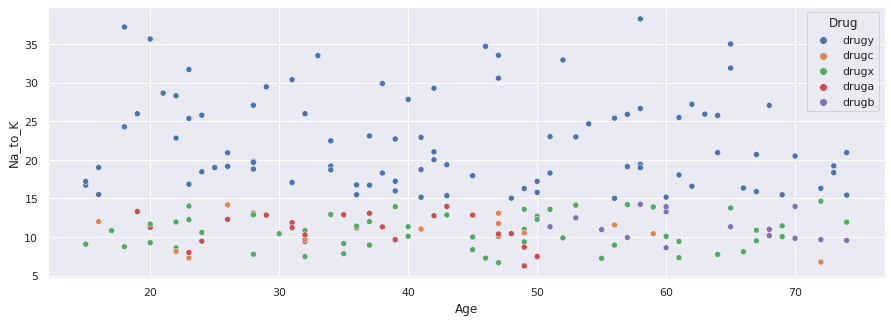

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Age',y='Na_to_K',data=dr,hue='Drug')

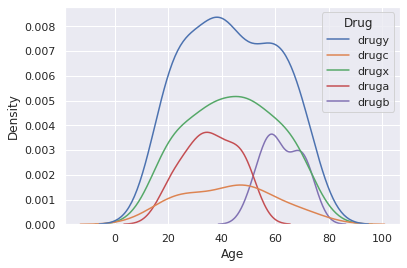

In [ ]:
sns.kdeplot(x='Age',data=dr,hue="Drug")

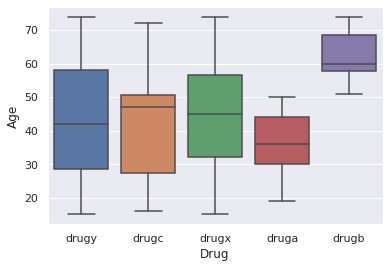

In [ ]:
sns.boxplot(x='Drug',y='Age',data=dr)

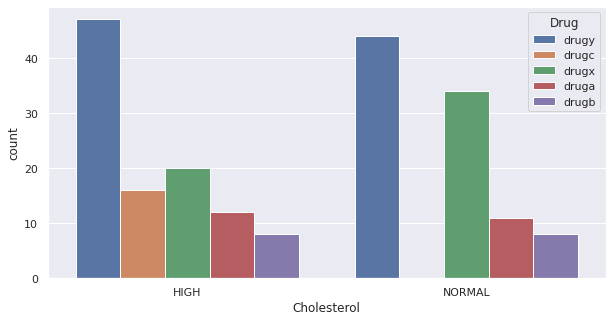

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Cholesterol',data=dr,hue='Drug')

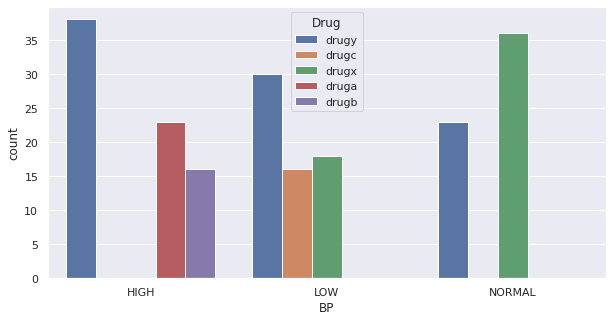

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='BP',data=dr,hue='Drug')

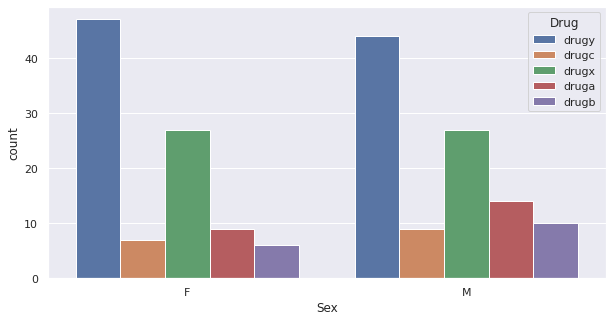

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=dr,hue='Drug')

## Pré-processamento

In [ ]:
dr.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugy
1,47,M,LOW,HIGH,13.093,drugc
2,47,M,LOW,HIGH,10.114,drugc
3,28,F,NORMAL,HIGH,7.798,drugx
4,61,F,LOW,HIGH,18.043,drugy


In [ ]:
dr['Sex'] = dr['Sex'].map({'M':0,'F':1})
dr['Cholesterol'] = dr['Cholesterol'].map({'NORMAL':0,'HIGH':1})

In [ ]:
dr['BP'] = dr['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})
dr['Drug'] = dr['Drug'].map({'druga':0,'drugb':1,'drugc':2,
                             'drugx':3,'drugy':4})

In [ ]:
dr.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4


In [ ]:
dr.corr()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,0.098573
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,0.098573,-0.328665,-0.055629,0.589120,1.000000


In [ ]:
dr.corr(method='spearman')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.104467,-0.120152,0.068811,-0.047274,-0.020408
Sex,-0.104467,1.000000,0.043867,-0.008811,0.145871,0.091099
BP,-0.120152,0.043867,1.000000,-0.036113,0.038882,-0.171598
Cholesterol,0.068811,-0.008811,-0.036113,1.000000,0.012823,-0.048022
Na_to_K,-0.047274,0.145871,0.038882,0.012823,1.000000,0.775643
Drug,-0.020408,0.091099,-0.171598,-0.048022,0.775643,1.000000


## Modelagem

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
x = dr.drop('Drug',axis=1)
y = dr.Drug

x_nor = MinMaxScaler().fit_transform(x)

In [ ]:
kfold = KFold(n_splits=5,shuffle=True)
metrica = ['accuracy','precision_macro','recall_macro','f1_macro']

cross_na = cross_validate(GaussianNB(),x_nor,y,cv=kfold,scoring=metrica)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for met in cross_na:
  print(f'-{met}')
  print(cross_na[met])
  media = np.mean(cross_na[met])
  std = np.std(cross_na[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.00758219 0.00179482 0.00876451 0.00973845 0.00179935]
Media:0.005935859680175781,Desvio:0.0034476163842096456
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.02047944 0.00457954 0.0242846  0.01538849 0.03334069]
Media:0.019614553451538085,Desvio:0.009538085757878607
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[0.775 0.875 0.85  0.875 0.875]
Media:0.85,Desvio:0.03872983346207416
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[0.61333333 0.80333333 0.82222222 0.825      0.74666667]
Media:0.7621111111111112,Desvio:0.07954996876721071
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[0.725      0.9        0.92941176 0.92857143 0.95      ]
Media:0.8865966386554623,Desvio:0.08235062593212658
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[0.62813187 0.83142857 0.84729437 0.84370123 0.8008658 ]
Media:0.7902843678061069,Desvio:

In [ ]:
cross_knn = cross_validate(KNeighborsClassifier(),x_nor,y,cv=kfold,scoring=metrica)

for met in cross_knn:
  print(f'-{met}')
  print(cross_knn[met])
  media = np.mean(cross_knn[met])
  std = np.std(cross_knn[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.00300169 0.00153637 0.00147152 0.00133586 0.00137758]
Media:0.0017446041107177734,Desvio:0.0006324521805992821
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.01033902 0.00808954 0.0080266  0.00753736 0.00744796]
Media:0.008288097381591798,Desvio:0.0010567430035397138
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[0.75  0.875 0.75  0.75  0.7  ]
Media:0.765,Desvio:0.058309518948453015
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[0.62       0.81780303 0.71727273 0.715      0.72051282]
Media:0.7181177156177156,Desvio:0.06257862057505556
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[0.65117647 0.9245614  0.81333333 0.83666667 0.77526316]
Media:0.8002002063983488,Desvio:0.08921649995062882
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[0.62172183 0.84839827 0.74746032 0.7380078  0.715     ]
Media:0.7341176422144164,Des

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_tree = cross_validate(DecisionTreeClassifier(),x_nor,y,cv=kfold,scoring=metrica)

for met in cross_tree:
  print(f'-{met}')
  print(cross_tree[met])
  media = np.mean(cross_tree[met])
  std = np.std(cross_tree[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.00169301 0.00145197 0.00086117 0.00083327 0.00084376]
Media:0.001136636734008789,Desvio:0.0003640531820235785
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.00388765 0.00271463 0.00243402 0.00241017 0.00251698]
Media:0.002792692184448242,Desvio:0.0005578561219871362
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[1.    0.975 1.    1.    0.975]
Media:0.99,Desvio:0.012247448713915901
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[1.         0.99090909 1.         1.         0.96666667]
Media:0.9915151515151516,Desvio:0.012913500456159055
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[1.         0.97142857 1.         1.         0.9       ]
Media:0.9742857142857144,Desvio:0.03875617133214438
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[1.         0.97996422 1.         1.         0.91515152]
Media:0.9790231473952404,Desv

In [ ]:
cross_svm =  cross_validate(SVC(kernel='poly',degree=4),x_nor,y,cv=kfold,scoring=metrica)

for met in cross_svm:
  print(f'-{met}')
  print(cross_svm[met])
  media = np.mean(cross_svm[met])
  std = np.std(cross_svm[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.00361419 0.00275874 0.00274324 0.00260758 0.00272536]
Media:0.0028898239135742186,Desvio:0.0003660812247548018
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.01723599 0.00485182 0.00450182 0.00473547 0.00494576]
Media:0.007254171371459961,Desvio:0.004993118763283246
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[0.825 0.975 0.9   0.85  0.975]
Media:0.9049999999999999,Desvio:0.062048368229954284
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[0.75833333 0.975      0.83114035 0.83154762 0.98823529]
Media:0.8768513194751584,Desvio:0.08969725108121457
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[0.88184874 0.99       0.94642857 0.88865546 0.95      ]
Media:0.9313865546218487,Desvio:0.04071412527827831
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[0.80438228 0.98153846 0.87333333 0.85107527 0.96536797]
Media:0.89513946

In [ ]:
cross_rf = cross_validate(RandomForestClassifier(),x_nor,y,cv=kfold,scoring=metrica)


for met in cross_rf:
  print(f'-{met}')
  print(cross_rf[met])
  media = np.mean(cross_rf[met])
  std = np.std(cross_rf[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.13191986 0.12893605 0.13493276 0.13237453 0.13007641]
Media:0.1316479206085205,Desvio:0.0020598996156900606
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.01211905 0.01241088 0.01693749 0.01298523 0.01286125]
Media:0.01346278190612793,Desvio:0.001764971546334928
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[0.95 1.   1.   1.   1.  ]
Media:0.99,Desvio:0.020000000000000018
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[0.89130435 1.         1.         1.         1.        ]
Media:0.9782608695652174,Desvio:0.04347826086956523
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[0.92777778 1.         1.         1.         1.        ]
Media:0.9855555555555556,Desvio:0.028888888888888877
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[0.88855275 1.         1.         1.         1.        ]
Media:0.9777105508870214,Desvio:0.0445

In [ ]:
cross_gra =  cross_validate(GradientBoostingClassifier(),x_nor,y,cv=kfold,scoring=metrica)


for met in cross_gra:
  print(f'-{met}')
  print(cross_gra[met])
  media = np.mean(cross_gra[met])
  std = np.std(cross_gra[met])
  print(f'Media:{media},Desvio:{std}')
  print('-*-'*20)

-fit_time
[0.37272239 0.35096931 0.35798097 0.37979102 0.39191508]
Media:0.37067575454711915,Desvio:0.014750506994256346
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-score_time
[0.00335813 0.00340319 0.00339627 0.00342631 0.00334716]
Media:0.0033862113952636717,Desvio:2.9364962484190765e-05
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_accuracy
[0.9   0.975 0.975 1.    0.95 ]
Media:0.96,Desvio:0.033911649915626334
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_precision_macro
[0.86461538 0.99047619 0.98461538 1.         0.91515152]
Media:0.950971694971695,Desvio:0.05260565622166414
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_recall_macro
[0.9        0.98181818 0.95       1.         0.88      ]
Media:0.9423636363636364,Desvio:0.0460886676880141
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
-test_f1_macro
[0.83961905 0.98559814 0.96342857 1.         0.87328321]
Media:0.9323857937526743,Desvio:

## Resultados

- Temos que os modelos com os melhores resultados foram a *árvore de decisão* e *random forest*, mas será escolhido árvore de decisão se for feito um melhore nos paraetro pode melhorar um pouco a perfomace, então sem uma otimização, teve a média das seguintes métricas:

metricas árvore de decisão (média):

  - **acuracia**: 0,99
  - **precisão(macro)**: 0,991
  - **recall(macro)**: 0,974
  - **f1(macro)**: 0,979

  


## Conclusão

podemos ver que teve modelos que teve uma boa perfomace, para um modelo de poucas linhas e colunas, verificar se que o modelo tem o potencial em se classificar as drogas, mostrando o potencial de modelos de machine learnig na área da saúde.